In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### numpy part

In [ ]:
# Ex 1
def inner_product(x, y):
    """
    x and y are array-like
    """
    assert len(x) == len(y), 'Hey, the two vectors live in different dimensions!'
    return np.dot(np.array(x), np.array(y))

# Ex 2
def MAE(x, y):
    """
    x and y are array-like
    """
    assert len(x) == len(y), 'Hey, the two vectors live in different dimensions!'
    return np.absolute(np.array(y) - np.array(x)).sum() / len(x)

# Ex 3
def lead(x, n):
    """
    x is a list, n is a positive integer
    """
    return np.r_[x[n:], np.full(n, np.nan)]

def lag(x, n):
    """
    x is a list, n is a positive integer
    """
    return np.r_[np.full(n, np.nan), x[:-n]]

# Ex 4
def distance(X, y):
    """
    Input: X is an numpy array with shape (n,d), y is a vector in R^d. 
    Output: numpy array of length n
    """
    return np.linalg.norm(X-y, axis=1)

### pandas part

####  Ex 1

In [3]:
# your_path_weather = '/Users/francis/Desktop/DSBA/Statistics and Probability/ProbabilityAndStatistics/Assignment_1/data/nycflights13/'
your_path_weather = ''
df = pd.read_csv(your_path_weather + 'nycflights13_weather.csv', skiprows=42)
# convert temperature to Celsius
df['temp'] = (df['temp'] - 32) * 5 / 9
# JFK airport data
jfk = df[df.origin == 'JFK'].reset_index(drop=True)

In [43]:
# there is no missng value
all(jfk.temp.notnull())

True

In [92]:
# daily mean temperature data
daily_temp = jfk.groupby(['year', 'month', 'day']).mean()['temp']
# set time index
time_index = pd.to_datetime(daily_temp.index.to_frame(index=False).reindex_axis(['year','month', 'day'], axis=1))
# prepare data to be plotted
temp_data = pd.Series(daily_temp.values, index=time_index.values)

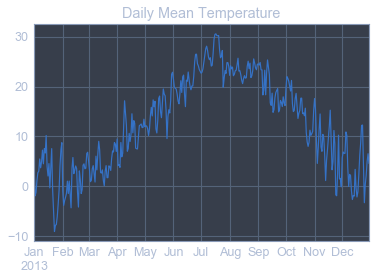

In [192]:
# plot the data
temp_data.plot()
plt.title('Daily Mean Temperature')
plt.show()

In [116]:
# there are 196 days whose mean temperature is greater than in the prceding day
len(temp_data[temp_data.diff() > 0].index.values)

196

In [118]:
# 5 hottest days
temp_data.sort_values(ascending=False)[:5]

2013-07-17    30.579167
2013-07-16    30.483333
2013-07-20    30.245833
2013-07-18    30.241667
2013-07-19    30.187500
dtype: float64

#### Ex 2

In [119]:
# your_path_flights = '/Users/francis/Desktop/DSBA/Statistics and Probability/ProbabilityAndStatistics/Assignment_1/data/nycflights13/'
your_path_flights = ''
flights = pd.read_csv(your_path_flights + 'nycflights13_flights.csv', skiprows=54)
# Select all columns between year and day
between = flights.loc[:, 'year':'day']
# Select all columns except those that lie between year and day
exclude = flights[flights.columns.difference(flights.loc[:, 'year':'day'].columns.values)]

#### Ex 3

In [136]:
# your_path_birthdate = '/Users/francis/Desktop/DSBA/Statistics and Probability/ProbabilityAndStatistics/Assignment_1/data/'
your_path_birthdate = ''
A = pd.read_csv(your_path_birthdate + 'some_birth_dates1.csv')
B = pd.read_csv(your_path_birthdate + 'some_birth_dates2.csv')
C = pd.read_csv(your_path_birthdate + 'some_birth_dates3.csv')

In [190]:
def union(x, y):
    return pd.merge(x, y, how='outer')

def intersection(x, y):
    return pd.merge(x, y, how='inner')

def difference(x, y):
    return x[~x.Name.isin(y.Name)].dropna()

In [ ]:
# A union B
union(A, B)
# A union B union C
union(union(A, B), C)
# A intersect B
intersection(A, B)
# A intersect C
intersection(A, C)
# A difference B
difference(A, B)